### Make sure tensorflow is installed

In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the pre-shuffled train and test data from keras dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x train shape:", x_train.shape, "y train shape:", y_train.shape)

x train shape: (60000, 28, 28) y train shape: (60000,)


### Visualize the data

In [4]:
# The number of training and test datasets
print("x train:", x_train.shape[0], "y train:", y_train.shape[0])

x train: 60000 y train: 60000


In [5]:
# Define the labels
fashion_mnist_labels = [
    "Tee",       # index 0
    "Trouser",   # index 1
    "Pullover",  # index 2
    "Dress",     # index 3
    "Coat",      # index 4
    "Sandal",    # index 5
    "Shirt",     # index 6
    "Sneaker",   # index 7
    "Bag",       # index 8
    "Ankle boot" # index 9
]

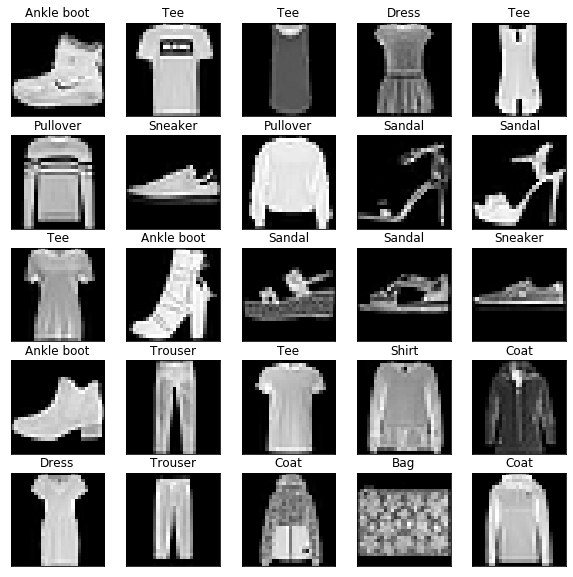

In [6]:
seed = 0
# creates a figure with multiple axes 
# returned as an ndarray of shape (n_rows, n_cols)
# The subplot_kw is supplied in order to remove the tick labels
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axs.flat):
    img_index = seed + i
    ax.imshow(x_train[img_index], cmap="gray")
    ax.set_title(fashion_mnist_labels[y_train[img_index]])

### Normalize the train and test images

In [7]:
# Normalize the data (values are represented as a float between 0 and 1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("number of train data", len(x_train))
print("number of test data", len(x_test))

number of train data 60000
number of test data 10000


### Split the data into validation, training, and test sets
- Training data: will be used for training the model
- Validation data: will be used to tune the hyperparameters when evaluating the models.
- Testing data: will be used to measure the final accuracy of the model.

In [8]:
# Further break the training data into train and validation
(x_train_set, x_valid_set) = x_train[5000:], x_train[:5000]
(y_train_set, y_valid_set) = y_train[5000:], y_train[:5000]

# Reshape the data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train_set = x_train_set.reshape(x_train_set.shape[0], w, h, 1)
x_valid_set = x_valid_set.reshape(x_valid_set.shape[0], w, h, 1)
x_test_set = x_test.reshape(x_test.shape[0], w, h, 1)

# One hot encode the labels
num_features = len(fashion_mnist_labels)
y_train_set = tf.keras.utils.to_categorical(y_train_set, num_features)
y_valid_set = tf.keras.utils.to_categorical(y_valid_set, num_features)
y_test_set = tf.keras.utils.to_categorical(y_test, num_features)

# Print the shapes of each set
print("x train shape:", x_train_set.shape, "y train shape:", y_train_set.shape)
print("x valid shape:", x_valid_set.shape, "y valid shape:", y_valid_set.shape)
print("x test shape:", x_test_set.shape, "y test shape:", y_test_set.shape)

assert(x_train_set.shape[0] == y_train_set.shape[0])
assert(x_valid_set.shape[0] == y_valid_set.shape[0])
assert(x_test_set.shape[0] == y_test_set.shape[0])

x train shape: (55000, 28, 28, 1) y train shape: (55000, 10)
x valid shape: (5000, 28, 28, 1) y valid shape: (5000, 10)
x test shape: (10000, 28, 28, 1) y test shape: (10000, 10)


### Create the model
*Layer 1*
- conv layer (filter:64, kernel:2, padding:same, activation:relu)
- max pool (size: 2)
- drop out (0.3)

*Layer 2*
- conv layer (filter:32, kernel:2, padding:same, activation:relu)
- max pool (size: 2)
- drop out (0.3)

*Flatten*

*Dense 1*
- size:256, activation:relu
- drop out (0.5)

*Dense 2*
- size:10, activation:softmax

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)  

### Compile the model
compile() takes in three arguments:
    - An optimizer
    - A loss function
    - A list of metrics

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="model.weights.best.hdf5", verbose=2, save_best_only=True)
model.fit(
    x_train_set, 
    y_train_set, 
    batch_size=2, 
    epochs=10, 
    validation_data=(x_valid_set, y_valid_set)
)

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
